In [688]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Non-neural models

In [689]:
data = pd.read_csv("./data/splited_RASFF_DATA_16092019.csv", sep=";", header=0, index_col=0)

data.head(3)

,DATE_CASE,NOT_COUNTRY,PROD_CAT,TYPE,RISK_DECISION,ACTION_TAKEN,DISTRIBUTION_STAT,HAZARDS_CAT,COUNT_ORIGEN,COUNT_DESTIN,COUNT_CONCERN
0,2019-09-13,France,meat and meat products (other than poultry),food,serious,no stock left,no distribution from notifying country,pathogenic micro-organisms,Romania,France,Belgium
1,2019-09-13,Denmark,"cocoa and cocoa preparations, coffee and tea",food,serious,recall from consumers,no distribution from notifying country,natural toxins (other),Germany,Denmark,
2,2019-09-13,Poland,confectionery,food,serious,informing authorities,distribution restricted to notifying country,food additives and flavourings,Croatia,Poland,


In [690]:
class Stage:
	def __init__(self, input, output):
		self.input = input
		self.output = output

		self.x = data.iloc[:, input]
		self.y = data.iloc[:, output]

		self.x_train, self.x_test, self.y_train, self.y_test = None, None, None, None

		self.classifier = self.Classifier()

	def transform(self):
		strategy = OneHotEncoder(handle_unknown="ignore")
		
		strategy.fit(self.x.values)
		
		self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(strategy.transform(self.x.values), self.y, test_size=0.2)

	class Classifier:
		pass

## Preprocessing

In [691]:
data.DATE_CASE = data.DATE_CASE.astype(str)
data.HAZARDS_CAT = data.HAZARDS_CAT.astype(str)

In [692]:
data = data.sample(frac=1)

## Transformation

In [693]:
stage1 = Stage(
	input=[0, 1, 6, 8],
	output=[2] # Product category
)

stage2 = Stage(
	input=[0, 1, 2, 6, 8],
	output=[7] # Hazard category
)

stage3 = Stage(
	input=[0, 1, 2, 6, 7, 8],
	output=[5] # Decision taken
)

## Data mining

In [694]:
stage1.transform()
stage2.transform()
stage3.transform()

### Decision trees

In [701]:
class DecisionTree:
	def __init__(self, stage):
		self.stage = stage
		
		self.classifier = tree.DecisionTreeClassifier(criterion="gini")
		self.classifier.fit(stage.x_train, stage.y_train)

		self.y_predict = None

	def predict(self):
		self.y_predict = self.classifier.predict(self.stage.x_test)

	def get_metrics(self):
		print(f"- Accuracy: {round(accuracy_score(self.stage.y_test, self.y_predict)*100, 2)}%")
		print(f"- Specifity: {round(self.classifier.score(self.stage.x_test, self.stage.y_test)*100, 2)}%")
		print(f"- Sensitivity: {round(recall_score(self.stage.y_test, self.y_predict, average='macro', zero_division=0)*100, 2)}%")
		print(f"- Precission: {round(precision_score(self.stage.y_test, self.y_predict, average='macro', zero_division=0)*100, 2)}%")
		
		print(classification_report(self.stage.y_test, self.y_predict, zero_division=0))

		cm = confusion_matrix(self.stage.y_test, self.y_predict)
		cm = ConfusionMatrixDisplay(confusion_matrix=cm)

		_, ax = plt.subplots(figsize=(10, 10))
		cm.plot(ax=ax)

In [702]:
stage1.classifier.decision_tree = DecisionTree(stage1)
stage2.classifier.decision_tree = DecisionTree(stage2)
stage3.classifier.decision_tree = DecisionTree(stage3)

In [703]:
stage1.classifier.decision_tree.predict()
stage2.classifier.decision_tree.predict()
stage3.classifier.decision_tree.predict()

Stage 1
- Accuracy: 86.76%
- Specifity: 86.76%
- Sensitivity: 82.63%
- Precission: 89.21%
                                                   precision    recall  f1-score   support

                              alcoholic beverages       0.97      0.89      0.93       102
                  animal by-products - (obsolete)       1.00      0.56      0.71         9
                    animal nutrition - (obsolete)       0.84      0.76      0.80       143
            bivalve molluscs and products thereof       0.82      0.80      0.81       498
                 cephalopods and products thereof       0.75      0.66      0.70       145
                      cereals and bakery products       0.88      0.82      0.85      1380
     cocoa and cocoa preparations, coffee and tea       0.93      0.88      0.90       633
                                   compound feeds       0.97      0.87      0.92       174
                                    confectionery       0.91      0.83      0.87       549

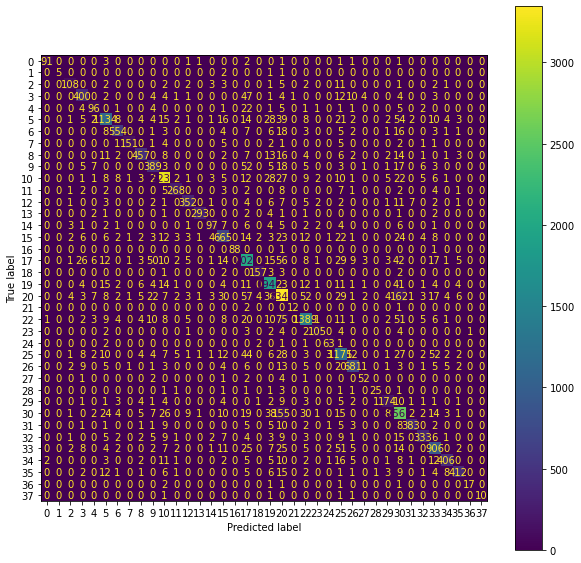

In [704]:
print("Stage 1")
stage1.classifier.decision_tree.get_metrics()

Stage 2
- Accuracy: 86.85%
- Specifity: 86.85%
- Sensitivity: 76.13%
- Precission: 79.88%
                                           precision    recall  f1-score   support

                                                0.93      0.81      0.87        16
                     adulteration / fraud       0.85      0.74      0.79       707
                                allergens       0.91      0.92      0.91      1236
          biological contaminants (other)       0.80      0.80      0.80       379
            chemical contaminants (other)       0.82      0.90      0.86        10
                              composition       0.83      0.90      0.87      2923
                 environmental pollutants       0.94      0.93      0.93       991
                           feed additives       0.86      0.63      0.73        38
           food additives and flavourings       0.84      0.82      0.83      1507
                           foreign bodies       0.86      0.81      0.83      1

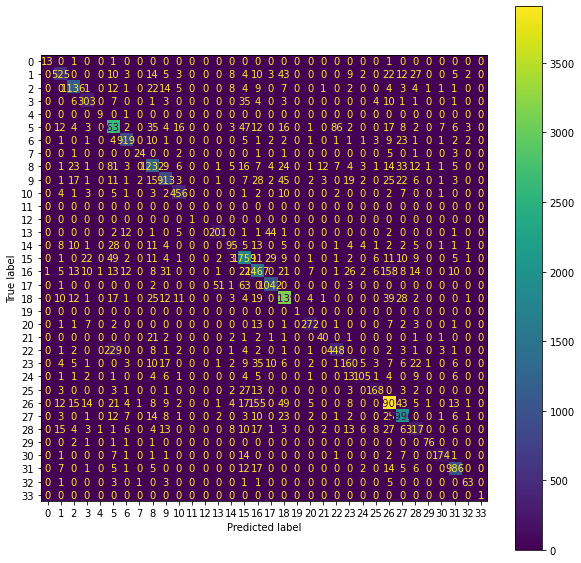

In [705]:
print("Stage 2")
stage2.classifier.decision_tree.get_metrics()

Stage 3
- Accuracy: 86.03%
- Specifity: 86.03%
- Sensitivity: 78.24%
- Precission: 81.8%
                                      precision    recall  f1-score   support

                                           0.81      0.79      0.80      1447
                          (obsolete)       0.82      0.82      0.82      1859
 (requested) removal of online offer       0.60      1.00      0.75         3
                         destruction       0.83      0.81      0.82      2350
                detained by operator       0.83      0.86      0.85       357
               import not authorised       0.72      0.69      0.70       768
               informing authorities       0.83      0.78      0.80       800
                 informing consignor       0.82      0.75      0.79       118
              informing recipient(s)       0.93      0.89      0.91      1189
                     no action taken       0.85      0.76      0.81       550
                       no stock left       0.79     

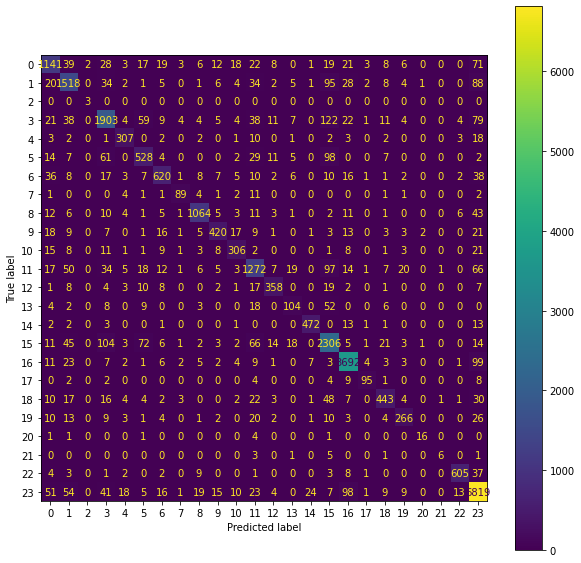

In [706]:
print("Stage 3")
stage3.classifier.decision_tree.get_metrics()